In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import math
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

$$
\begin{align} 
\ln(\textit{inc}_{2020}) &= \ln(\textit{inc}_0) + \ln(\varepsilon_{2020}) \\
\ln(\textit{inc}_{t})    &= (1-\rho) [\ln(\textit{inc}_0) + g(t-2020)] 
                         + \rho \ln(\textit{inc}_{t-1}) + \ln(\varepsilon_{t}) \ \
                          \forall 2021 \leq t \leq 2059
\end{align} 
$$

In [2]:
# (a)
sd = 0.13
mu = 0
rho = 0.4
g = 0.025
ln_inc0 = math.log(80000)
num_simu = 10000
num_years = 40

ln_err = []
for i in range(num_simu):
    ln_err.append(random.normal(mu, sd, num_years))
ln_err = np.stack(ln_err)

ln_inct = ln_err

# 2020 year ------> ln_inct[:,0]
ln_inct[:,0] = ln_inc0 + ln_err[:,0]
for i in range(0,num_years):
    t = 2020 + i
    if i !=0:
        ln_inct[:,i] += (1-rho)*(ln_inc0 + g*(t-2020)) + rho*ln_inct[:,i-1]

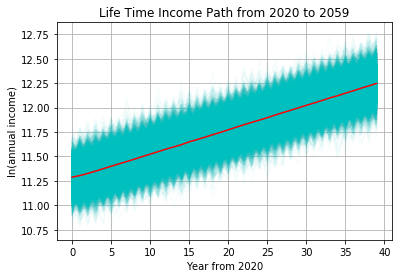

In [118]:
# make a plot :) 
for i in range(num_simu):
    plt.plot(ln_inct[i,], 'c' ,alpha=0.03)
plt.plot(np.mean(ln_inct,axis=0),'r')
plt.title('Life Time Income Path from 2020 to 2059')
plt.xlabel('Year from 2020'); plt.ylabel('ln(annual income)')
plt.grid()
plt.show()

4.2100% of the class will earn more than $100,000.
0.0015% of the class will earn less than $70,000.
The p-value of Shapiro-Wilk test is 0.00000000000000000000000:


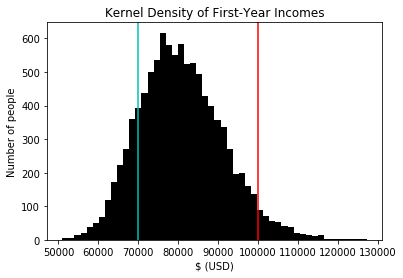

In [3]:
# (b)
first_year_inc = np.exp(ln_inct[:,0])
higher_line = 100000
lower_line = 70000

plt.hist(first_year_inc, bins=50,color='black')
plt.axvline(x=higher_line,color='r')
plt.axvline(x=lower_line,color='c')
plt.title('Kernel Density of First-Year Incomes')
plt.xlabel('$ (USD)'); plt.ylabel('Number of people')

# percent of your class will earn more than $100,000 (red)
percent_higher = sum(first_year_inc > higher_line)/num_simu
print('%.4f%% of the class will earn more than $100,000.'
      %(100*percent_higher))

# percent of the class will earn less than $70,000 (cyan)
percent_lower = sum(first_year_inc < lower_line)/num_simu
print('%.4f%% of the class will earn less than $70,000.'
      % (100*percent_lower/num_simu) )

print('The p-value of Shapiro-Wilk test is %.23lf:' %shapiro(first_year_inc)[1])
# Under 95% confidence level, with the significant p-value from Shapiro-Wilk test: 
# we tend to reject the null hypothesis that the first-year 
# incomes are not normally distributed; it is a right-skewed distribution.

16.860 percent of the simulations are you able to pay off the loan in 10 years.


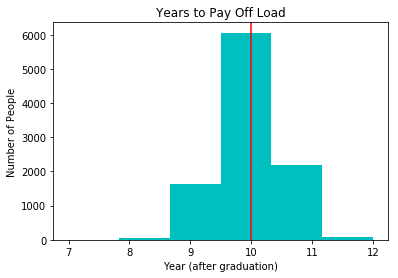

In [4]:
# (c)
loan = np.full([10000] , 95000)
indicator = np.ones([10000])

ten_perc = 0.1*np.exp(ln_inct)
for i in range(num_simu):
    for j in range(num_years):
        loan[i] = loan[i] - ten_perc[i,j]
        if loan[i] <= 0: 
            indicator[i] = j
            break
plt.hist(indicator, bins=len(np.unique(indicator)), color='c')
plt.title('Years to Pay Off Load')
plt.xlabel('Year (after graduation)'); plt.ylabel('Number of People')
yr = 10
plt.axvline(x=yr,color='r')
percent_before_10y = sum(indicator<yr)/len(indicator)
print('%.3f percent of the simulations are you able to pay off the loan in 10 years.'
     %(100*percent_before_10y))